# Analisis Exploratorio Trocafone

In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Nescesario para mapas.
import plotly as py

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid") # tipo de grid seaborn

# Si desea guardar los plots, decrementar.
# if not os.path.exists('img'):
    # os.mkdir('img')

In [3]:
# Set de datos
path = 'data/events.csv'
eventos_2018 = pd.read_csv(path)

/home/bauticavanese/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



## Previo analisis

In [4]:
#Veo la forma
eventos_2018.shape

(1011288, 23)

In [5]:
#Información sobre el data frame 
eventos_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [6]:
eventos_2018.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Podemos ver varios campos nulos, que luego tendremos en cuenta para cada analisis.

In [7]:
# Damos formato a la fecha.
eventos_2018['timestamp_format'] = pd.to_datetime(eventos_2018['timestamp'])

# Agrego columna fecha
eventos_2018['date'] = eventos_2018['timestamp_format'].dt.date
# Agrego columna para los meses.
eventos_2018['month'] = eventos_2018['timestamp_format'].dt.month
# Agrego columna dias
eventos_2018['day'] = eventos_2018['timestamp_format'].dt.weekday_name
# Agrego columna de horas
eventos_2018['hour'] = eventos_2018['timestamp_format'].dt.hour

In [8]:
# Evento como categoria
eventos_2018['event_category'] = eventos_2018['event'].astype('category')

## Topicos generales y previsualizacion de los datos.

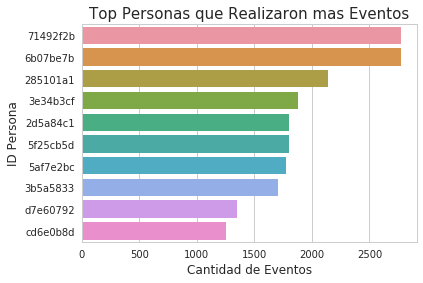

In [9]:
# Top personas con mas eventos
top_personas = eventos_2018.groupby('person')['event_category'].count().sort_values(ascending=False)[:10]

g = sns.barplot(x=top_personas.values, y=top_personas.index, orient='h')
g.set_title("Top Personas que Realizaron mas Eventos", fontsize=15)
g.set_xlabel("Cantidad de Eventos", fontsize=12)
g.set_ylabel("ID Persona", fontsize=12)
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_personas.png')

### Cuales son los eventos mas ocurrentes en la plataforma?

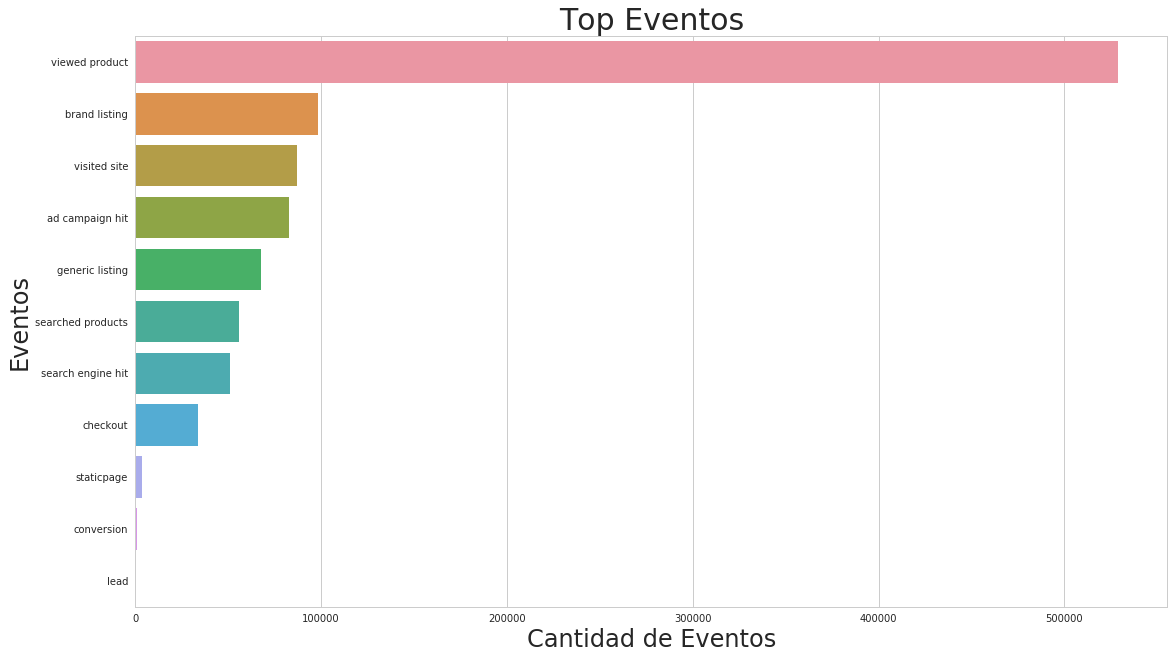

In [10]:
# Top eventos
top_eventos = eventos_2018.groupby('event')['event_category'].count().sort_values(ascending=False)

g = sns.barplot(x=top_eventos.values, y=top_eventos.index, orient='h')
g.set_title("Top Eventos", fontsize=30)
g.set_xlabel("Cantidad de Eventos", fontsize=24)
g.set_ylabel("Eventos", fontsize=24)

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_eventos.png')

### Como se comportan los usuarios que interactuan con la plataforma desde distintos dispositivos?

In [11]:
eventos_2018['operating_system'] = eventos_2018['operating_system_version'].str.split(n=1).str[0]

In [12]:
eventos_por_so = eventos_2018.groupby(['operating_system', 'screen_resolution'], as_index=False)['event_category'].count()
#info
eventos_por_so['event_category'].describe()

count      352.000000
mean       248.232955
std       1984.619865
min          1.000000
25%          1.000000
50%          4.000000
75%         17.000000
max      29857.000000
Name: event_category, dtype: float64

In [13]:
# Filtramos para visualizar las mas relevantes.
minimo = 500
eventos_por_so = eventos_por_so.loc[eventos_por_so['event_category'] > minimo]

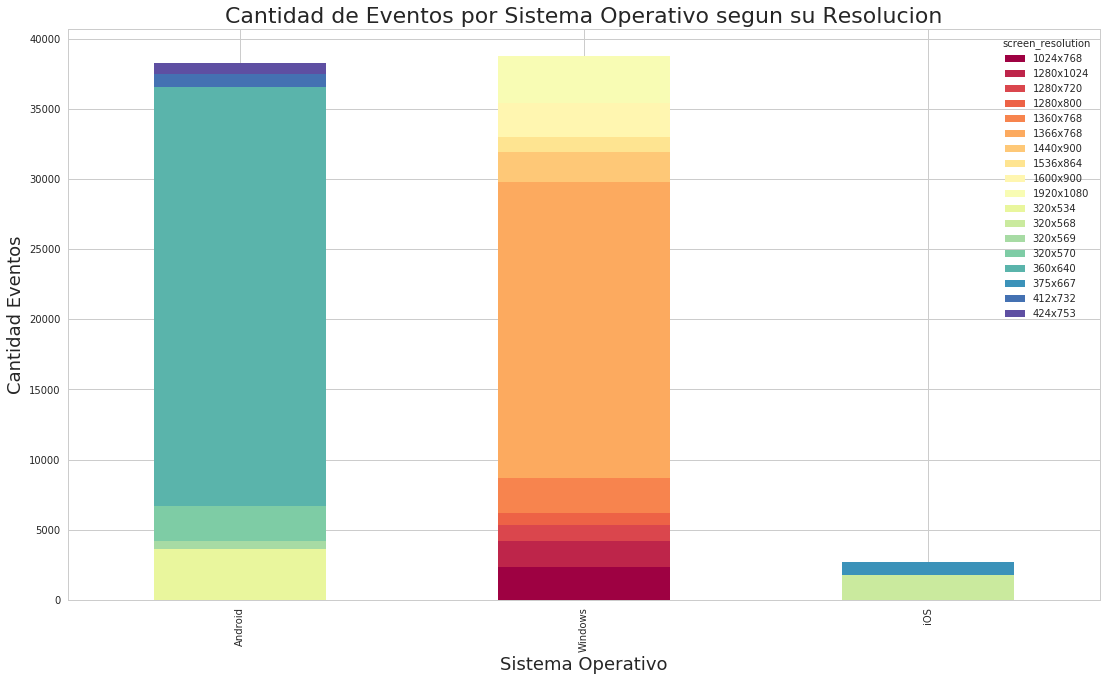

In [14]:
pivoted = pd.pivot_table(eventos_por_so,values='event_category',columns='screen_resolution', \
                         index='operating_system')

f = plt.figure()
plt.title('Cantidad de Eventos por Sistema Operativo segun su Resolucion', fontsize=22)
ax = pivoted.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(18.5, 10.5), ax=f.gca())
ax.set_ylabel('Cantidad Eventos', fontsize=18);
ax.set_xlabel('Sistema Operativo', fontsize=18);
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/eventos_os_resolucion.png')

Con este plot podemos deducir que tanto windows como android son los sistemas operativos mas activos en la plataforma.
Ademas con la informacion de la resolucion de pantalla podemos ver:
    
<table style="width:100%">
  <tr>
    <th>Marca</th>
    <th>Resolucion Predominante</th>
    <th>Modelo</th>
  </tr>
  <tr>
    <td>iOS</td>
    <td>320 x 568</td>
    <td>iPhone 5/SE</td>
  </tr>
  <tr>
    <td>Android</td>
    <td>360x640</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Windows</td>
    <td>1366x768</td>
    <td>-</td>
  </tr>
</table> 






### Cuales son las marcas de dispositivos mas vendidas?

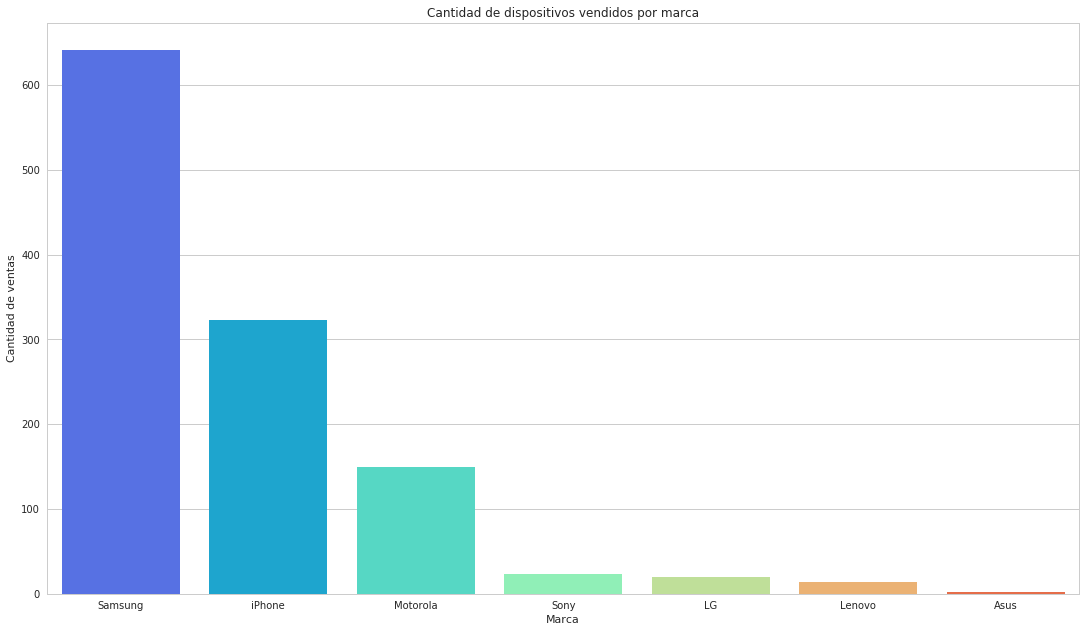

In [15]:
conversion_e = eventos_2018.loc[eventos_2018['event_category'] == 'conversion']
model_conversion = conversion_e['model'].groupby(conversion_e.model.str.split(n=1).str[0]).agg('count').sort_values(ascending=False)
g = sns.barplot(x=model_conversion.index, y=model_conversion.values, palette='rainbow', orient='v')
g.set_xlabel('Marca')
g.set_ylabel('Cantidad de ventas')
g.set_title('Cantidad de dispositivos vendidos por marca')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/ventas_por_marca.png')

### Checkout vs Conversion

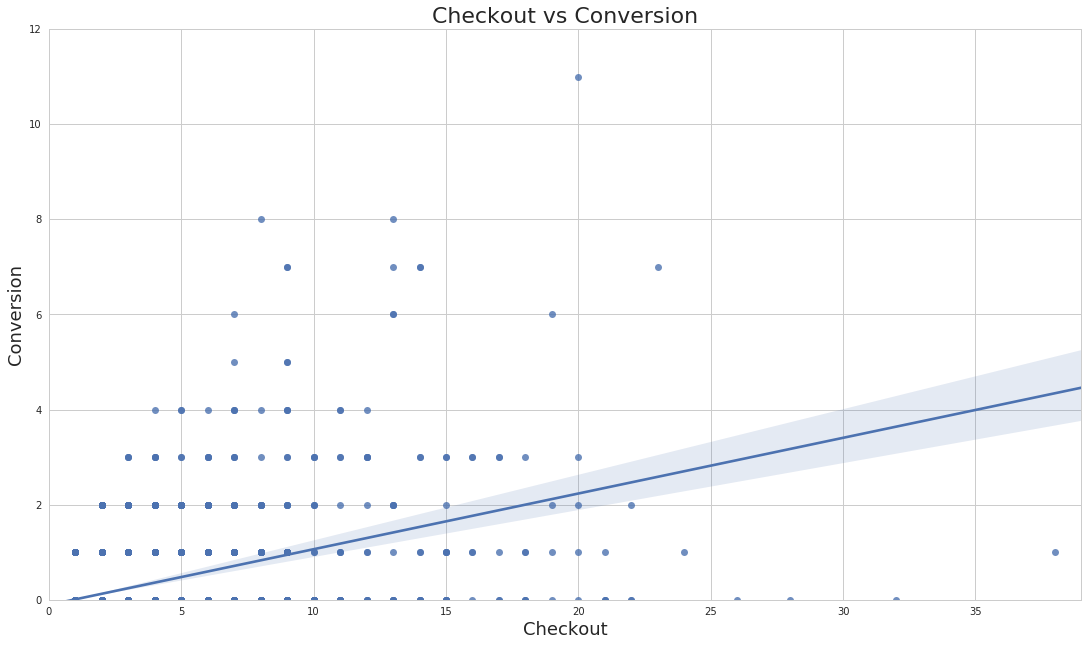

In [16]:
# Filtro eventos por checkout y conversion
checkout_vs_conver = eventos_2018.loc[(eventos_2018['event'] == 'checkout') | (eventos_2018['event'] == 'conversion')].groupby('person')['event'].value_counts()

checkout_vs_conver = checkout_vs_conver.unstack().fillna(0)
checkout_vs_conver.reset_index(inplace=True)
# Filtramos los datos, no puede haber una conversion sin antes un checkout o mas conversiones que chekout.
checkout_vs_conver = checkout_vs_conver.loc[checkout_vs_conver['conversion'] <= checkout_vs_conver['checkout']]

# Plot
g = sns.regplot(x="checkout", y="conversion", data=checkout_vs_conver)
g.set_title("Checkout vs Conversion", fontsize=22)
g.set_xlabel("Checkout",fontsize=18)
g.set_ylabel("Conversion", fontsize=18)
# Limites
g.set_xlim(0, checkout_vs_conver['checkout'].max()+1)
g.set_ylim(0, checkout_vs_conver['conversion'].max()+1)
f = g.get_figure()

f.set_size_inches(18.5, 10.5, forward=True)
#f.savefig('img/new_vs_returning_mes.png')

# Analisis Geografico de Fuentes

Damos un vistazo general a las localidades en donde se generan los eventos.

In [17]:
# Proporcion de datos reales sobre el total.
eventos_2018['country'].isnull().sum() / eventos_2018['country'].count()

10.57371420723752

In [18]:
# Id paises (Argentina : ARG 
#            Brasil : BRA
#                      ...) .
id_paises = pd.read_csv('data/id-countries.csv')
id_paises['count'] = 0

In [19]:
# Calculando la cantidad de eventos por pais.
countries_data = pd.DataFrame(eventos_2018['country'].value_counts())
countries_data.reset_index(inplace=True)
countries_data.columns = ['country', 'count']
countries_data.replace({'United States' : 'United States of America'}, inplace= True)

In [20]:
# Cantidad de eventos sobre todos los paises.
data_paises = countries_data.merge(id_paises, how='right', on=['country']).fillna(0)

In [21]:
# Top 5 paises con mas eventos. Filtro los indeterminados.
data_paises.loc[data_paises['country'] != 'Unknown'][:5]

,country,count_x,id,count_y
0,Brazil,84308.0,BRA,0
1,United States of America,465.0,USA,0
2,Argentina,94.0,ARG,0
3,Canada,35.0,CAN,0
4,France,13.0,FRA,0


Con lo visto anteriormente es nescesario realizar el analisis sobre una escala lograitmica para visualizar mejor los datos.

In [22]:
# Escala logaritmica.
data_paises['count_log'] = np.log(data_paises['count_x'] + 1)

In [23]:
# Pyplot

df = data_paises

data_x = [ dict(
        type = 'choropleth',
        locations = df['id'],
        z = df['count_log'],
        text = df['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        reversescale = True,
        colorbar = dict(
            title = 'Cantidad Eventos (Log)'
        ),
    ) ]

layout = dict(
    title = 'Cantidad Total de Eventos 2018',
    geo = dict(
        showframe = False,
        showcoastlines = False,
    )
)

fig = dict( data=data_x, layout=layout )

# Decrementar para ver mapa.
#py.plotly.iplot(fig)

# Analisis Temporal

Antes de comenzar con el analisis, es nescesario saber en el rango de fechas que estamos trabajando.

In [24]:
# fecha minima
eventos_2018['timestamp_format'].min()

Timestamp('2018-01-01 07:32:26')

In [25]:
# fecha maxima
eventos_2018['timestamp_format'].max()

Timestamp('2018-06-15 23:59:31')

Primero haremos un plot para ver como estan distribuidos los datos.

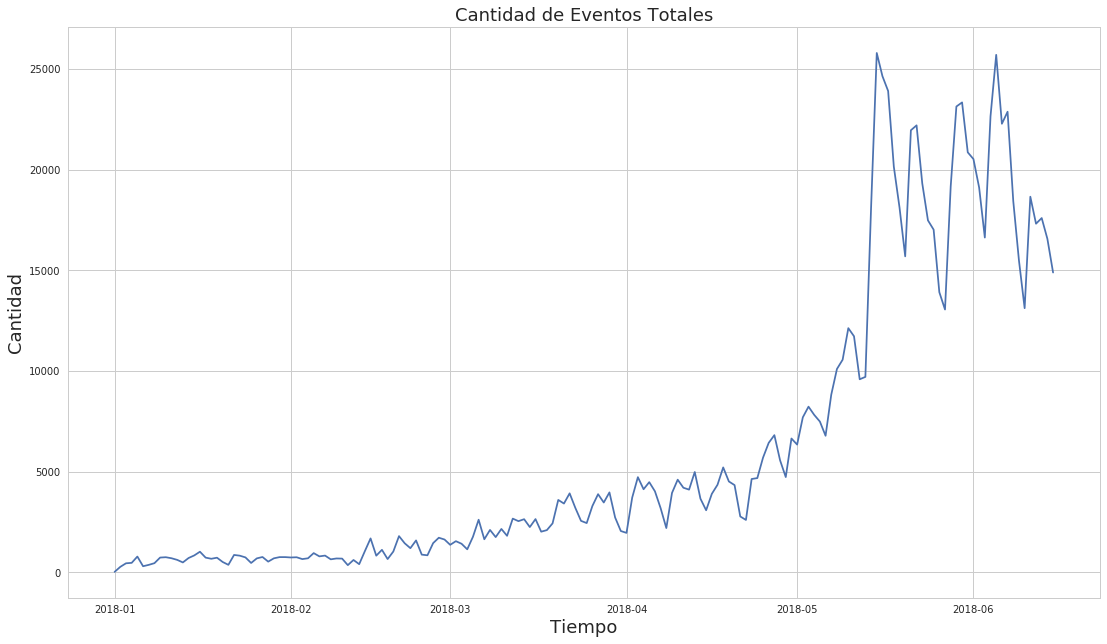

In [26]:
eventos_totales = eventos_2018.groupby('date')['event_category'].count()
g = eventos_totales.plot()
g.set_title("Cantidad de Eventos Totales", fontsize=18)
g.set_xlabel("Tiempo", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/cant_eventos_tiempo.png')

Vemos un crecimiento de interacciones con el tiempo, mas que nada de Mayo para Junio.

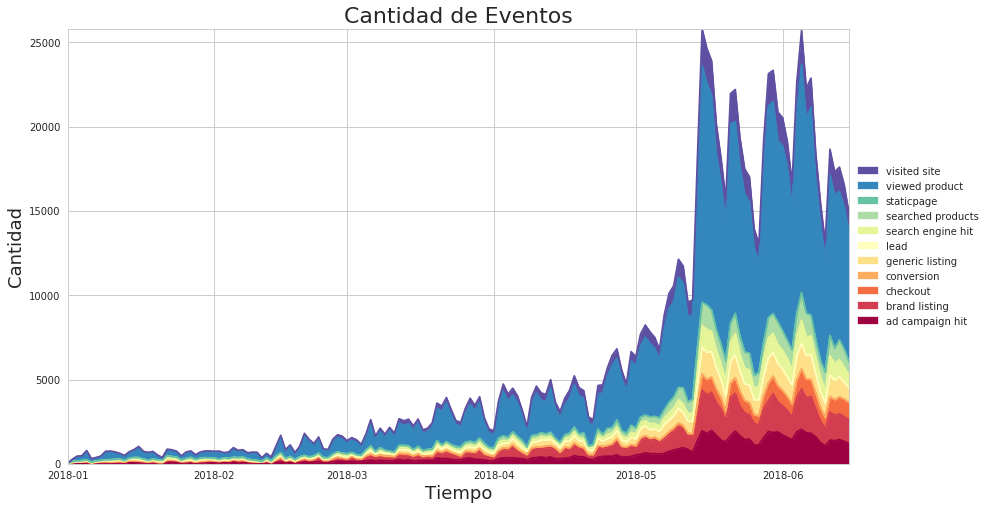

In [29]:
# Cantidad de eventos por tipo.
eventos_totales = eventos_2018.groupby('date')['event_category'].value_counts()
eventos_totales = eventos_totales.unstack(fill_value=0)

# Plot 
f = plt.figure()
plt.title('Cantidad de Eventos', fontsize=22)
ax = eventos_totales.plot(kind='area', stacked=True, colormap='Spectral', figsize=(14,8), ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Cantidad', fontsize=18);
ax.set_xlabel('Tiempo', fontsize=18);
# Limites grafico
ax.set_xlim(eventos_totales.index.min(),eventos_totales.index.max())
ax.set_ylim(0,eventos_totales.sum(axis=1).max())

plt.show()
ax.get_figure().set_size_inches(18.5, 10.5, forward=True)
ax.get_figure().savefig('img/eventos_mes.png')

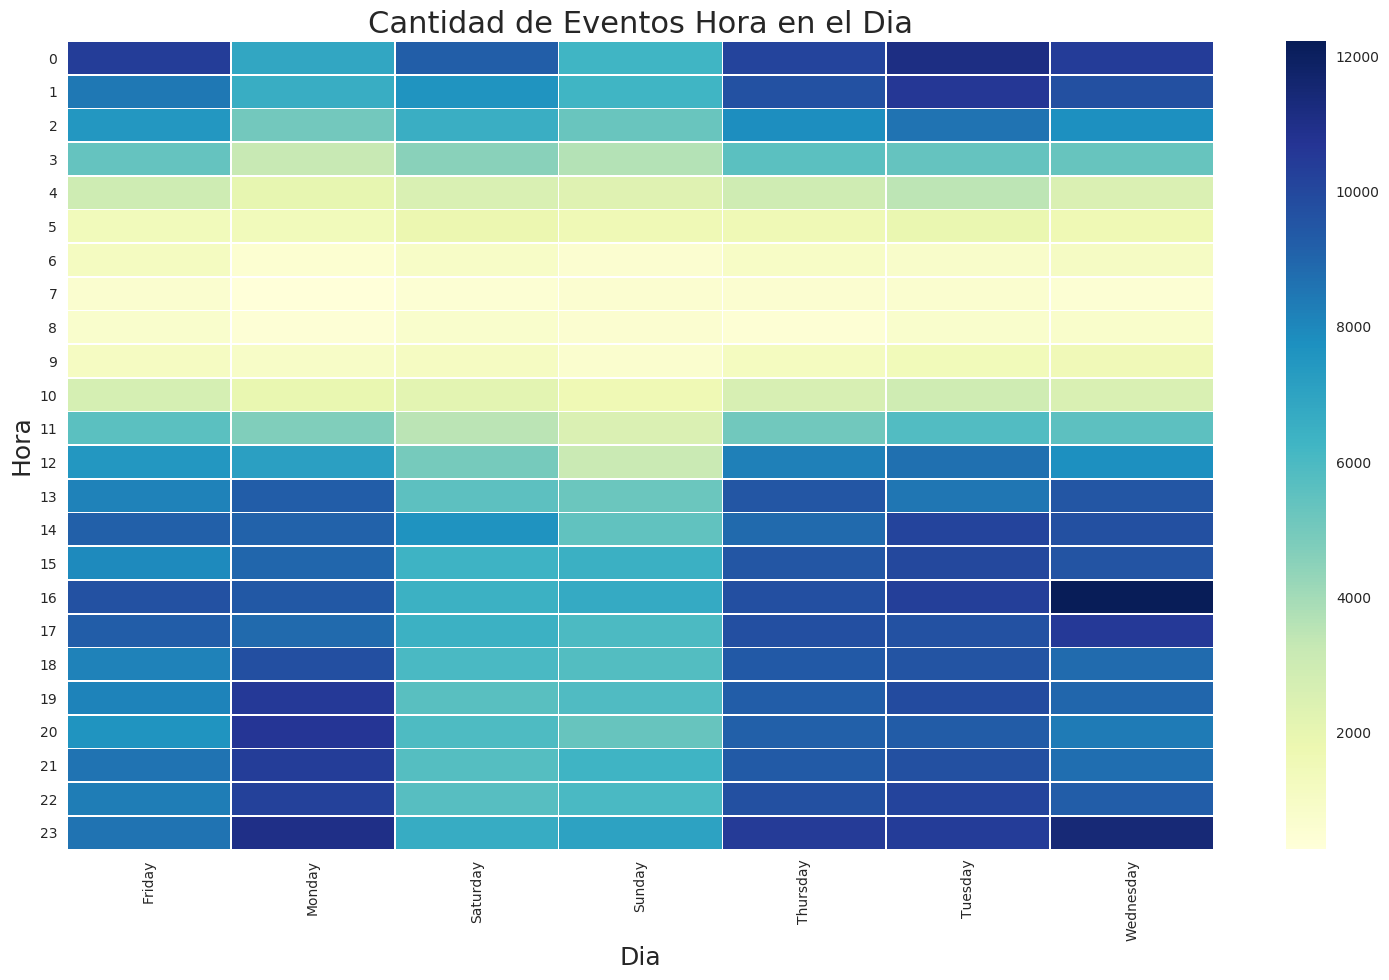

In [39]:
### Cantirdad de eventos por combinacion de hora en el dia.

eventos_2018['event_c'] = 1
for_heatmap_hr_day = eventos_2018.pivot_table(index='hour', columns='day', values='event_c', aggfunc='sum')

g =  sns.heatmap(for_heatmap_hr_day , linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Eventos Hora en el Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Hora", fontsize=18)


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/eventos_hr_dia.png')

### Como son las interacciones con respecto a las capanias de publicidad?

En que horario se frecuentan mas?

In [40]:
campaing_hint = eventos_2018.loc[eventos_2018['event_category'] == 'ad campaign hit'].groupby('hour')['event'].count()

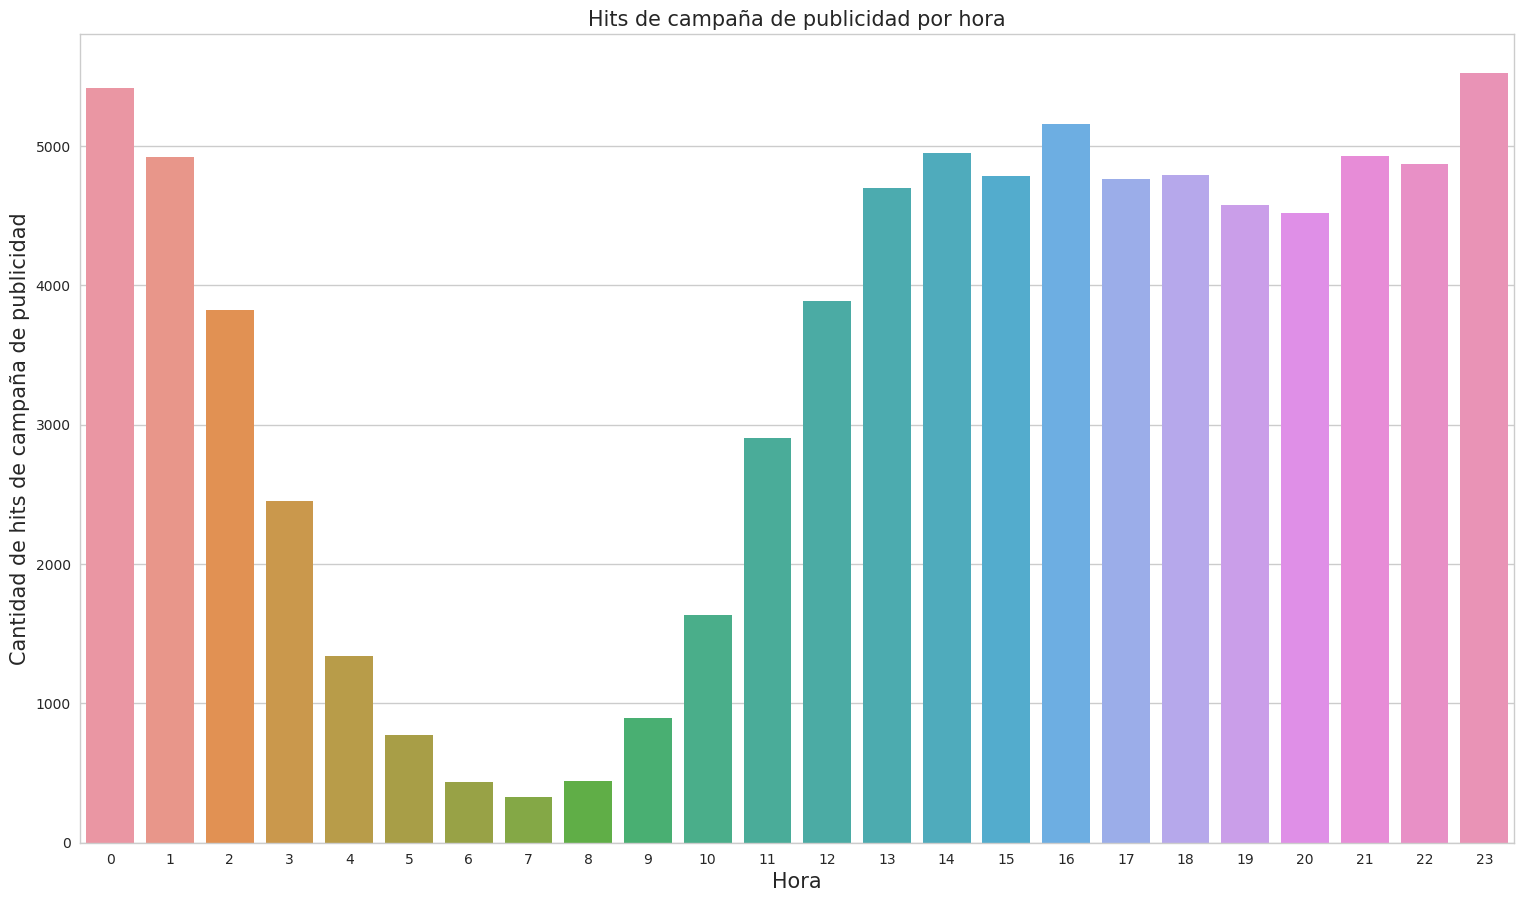

In [41]:
g = sns.barplot(x=campaing_hint.index, y=campaing_hint.values, orient='v')

g.set_xlabel("Hora", fontsize=15)
g.set_ylabel("Cantidad de hits de campaña de publicidad", fontsize=15)
g.set_title("Hits de campaña de publicidad por hora", fontsize=15)


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/campaing_hints_hr.png')

Como se puede osbervar, los usuarios ingresan mediante publicidad en media noche; seria interesante conocer las fuentes de esas publicidades.

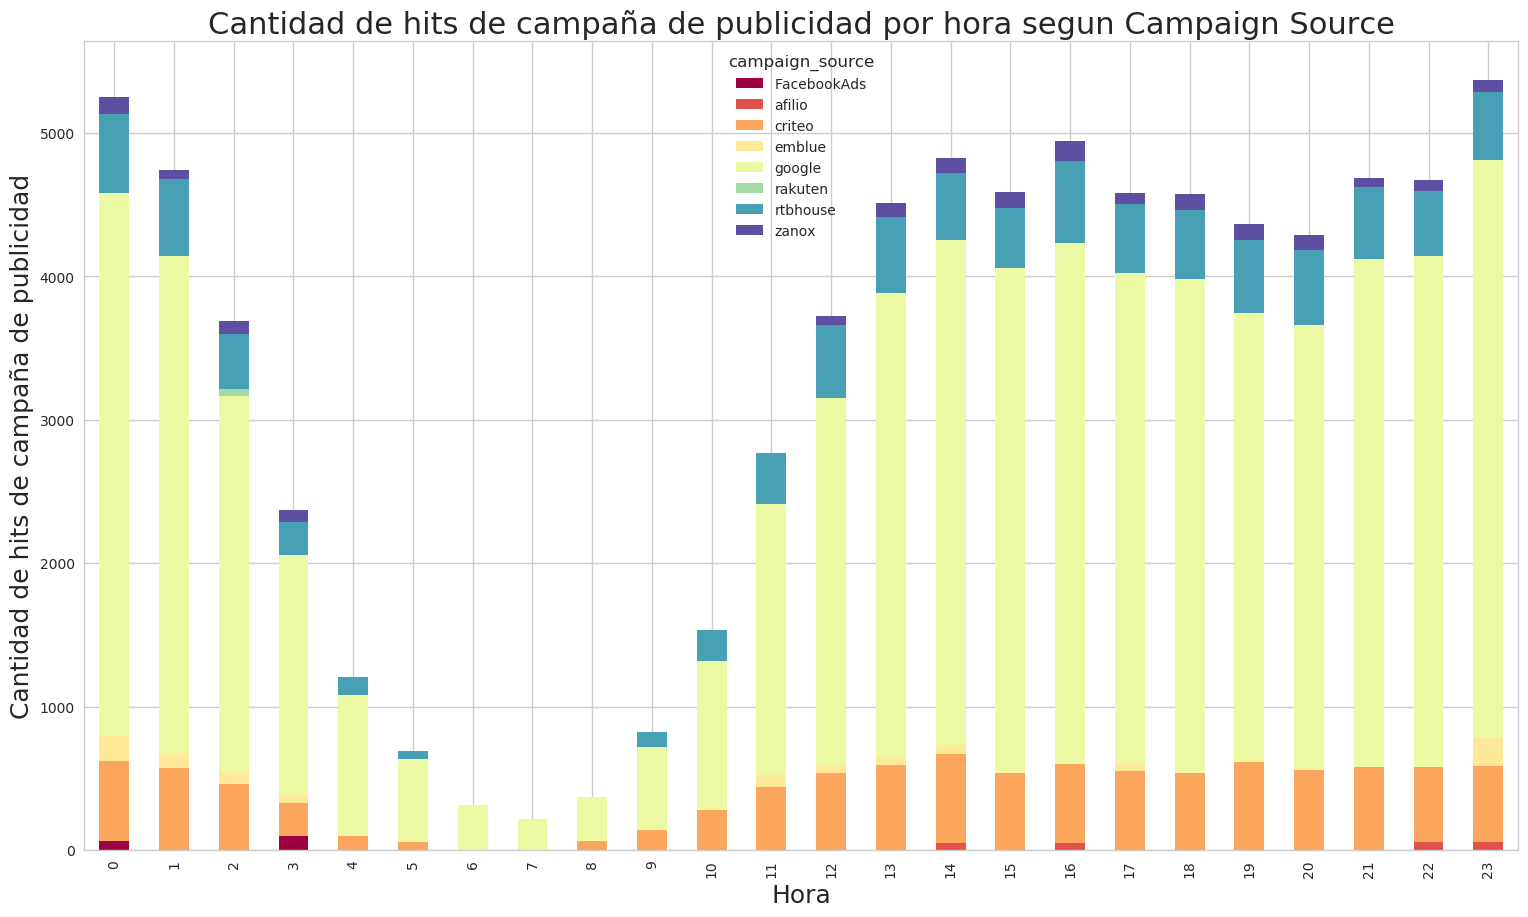

In [42]:
# Eventos por hora (campaing source)
eventosPorHourAndCampaignSource = eventos_2018.groupby(['hour', 'campaign_source'], as_index=False)['event'].count()

# Filtro valores no significativos.
minimo = 50
eventosPorHourAndCampaignSource = eventosPorHourAndCampaignSource.loc[eventosPorHourAndCampaignSource['event'] > minimo]

# Pivot table.
pivotedHour = pd.pivot_table(eventosPorHourAndCampaignSource,values='event',columns='campaign_source', \
                         index='hour')
# Plot
f = plt.figure()
plt.title('Cantidad de hits de campaña de publicidad por hora segun Campaign Source', fontsize=22)
ax = pivotedHour.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(18.5,10.5), ax=f.gca())
ax.set_ylabel('Cantidad de hits de campaña de publicidad', fontsize=18);
ax.set_xlabel('Hora', fontsize=18);
plt.show()


f.set_size_inches(18.5, 10.5, forward=True)
f.savefig('img/hits_hr_stacked.png')

### Dispositivos mas relevantes segun el mes

In [43]:
# Nueva columna con la marca del dispositivo
eventos_2018['trademark'] = eventos_2018['model'].str.split(n=1).str[0]

In [44]:
# iPhone, iPad eq Apple
eventos_2018['trademark'] = eventos_2018['trademark'].replace({'iPad' : 'Apple', 'iPhone' : 'Apple'})
# Obtengo las marcas mas visitadas ocurrentes.
marcas_ordenadas = eventos_2018.loc[eventos_2018['event'] == 'viewed product']['trademark'].value_counts().index

In [45]:
model_conversion = pd.DataFrame(eventos_2018.groupby(['trademark', 'month'])['trademark'].agg('count'))
model_conversion.columns = ['count']
model_conversion.reset_index(inplace=True)

In [46]:
# Pivot table, cantidad de ocurrencias por mes.
table_mes_marca = pd.pivot_table(model_conversion,values='count',columns='trademark', \
                         index='month', fill_value=0)
table_mes_marca

trademark,Apple,Asus,Blackberry,LG,Lenovo,Motorola,Quantum,Samsung,Sony
month,,,,,,,,,
1,4766,259,0,145,35,915,5,3053,99
2,9232,297,0,232,93,1002,31,3687,93
3,19610,471,0,815,352,4317,24,15163,634
4,29747,485,0,1116,388,6548,10,29065,1002
5,122175,224,1,4802,2373,34052,232,102432,3104
6,72969,355,0,2614,1538,16684,218,64727,2093


In [47]:
# "Normalizo".
table_mes_marca = table_mes_marca.divide(table_mes_marca.sum(axis=1), axis=0)
# Reeorganizo las columnas.
table_mes_marca = table_mes_marca.reindex(marcas_ordenadas[::-1], axis=1)


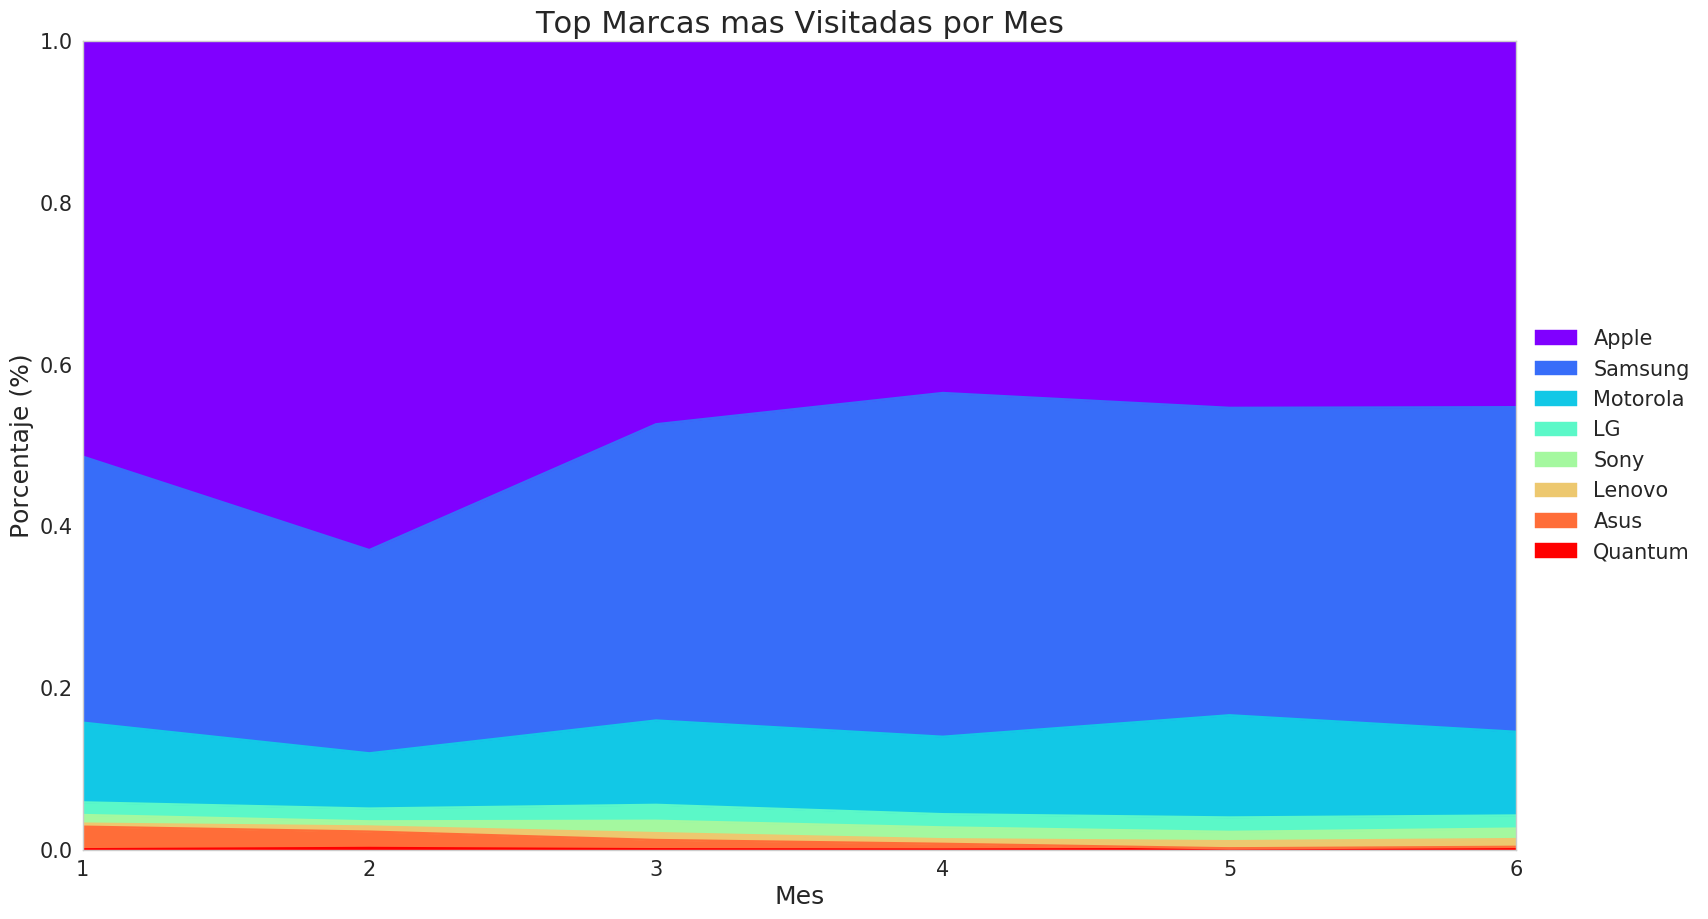

In [48]:
# Plot 
f = plt.figure()
ax = table_mes_marca.plot(kind='area', stacked=True, colormap='rainbow_r', figsize=(18.5, 10.5), ax=f.gca(), fontsize=15)
# Config labels y handels
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=15)
plt.title('Top Marcas mas Visitadas por Mes', fontsize=22)
ax.set_ylabel('Porcentaje (%)', fontsize=18);
ax.set_xlabel('Mes', fontsize=18);
# Limites grafico
ax.set_ylim(0,1)
ax.set_xlim(1,6)
plt.show()

#f.set_size_inches(18.5, 10.5, forward=True)
#f.savefig('img/top_marcas_mes.png')

### Que horarios frecuenta el usuario segun el sistema operativo?

In [49]:
eventos_so_hora = eventos_2018.groupby(['operating_system', 'hour'], as_index=False)['event'].count()
# Escala logaritmica para visalizar mejor los datos.
eventos_so_hora['event_log'] = np.log(eventos_so_hora['event']+1)
for_heatmap_hr_so = pd.pivot_table(index='hour', columns='operating_system', values='event_log', data=eventos_so_hora)

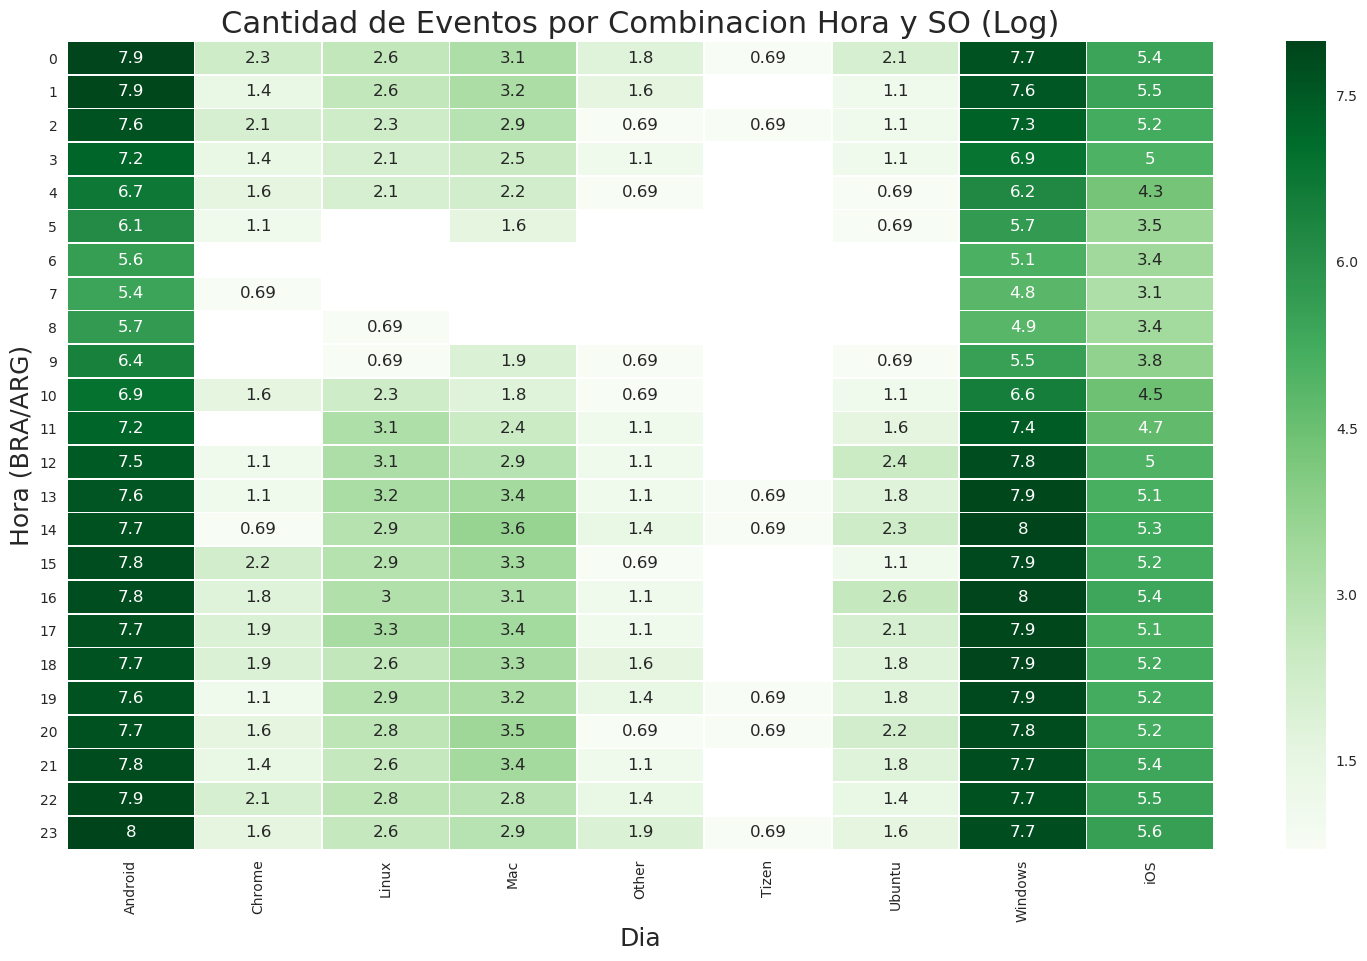

In [50]:
g =  sns.heatmap(for_heatmap_hr_so , linewidths=.5, cmap="Greens", annot=True) # annot=True
g.set_title("Cantidad de Eventos por Combinacion Hora y SO (Log)", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Hora (BRA/ARG)", fontsize=18)
f = g.get_figure()

f.set_size_inches(18.5, 10.5, forward=True)
f.savefig('img/eventos_hr_so.png')

Se puede observar como en dispositivos mobiles/portables como lo son SmartPhones/Tables/etc con un SO (Android/iOS)
obtiene su valor maximo a eso delas 23:00 y se matiene hasta 2:00 aprox, en cambio para dispositivos como computadoras
su pico lo alcanza entre las 17 y 20 hs.

### Usuarios nuevos vs regresantes

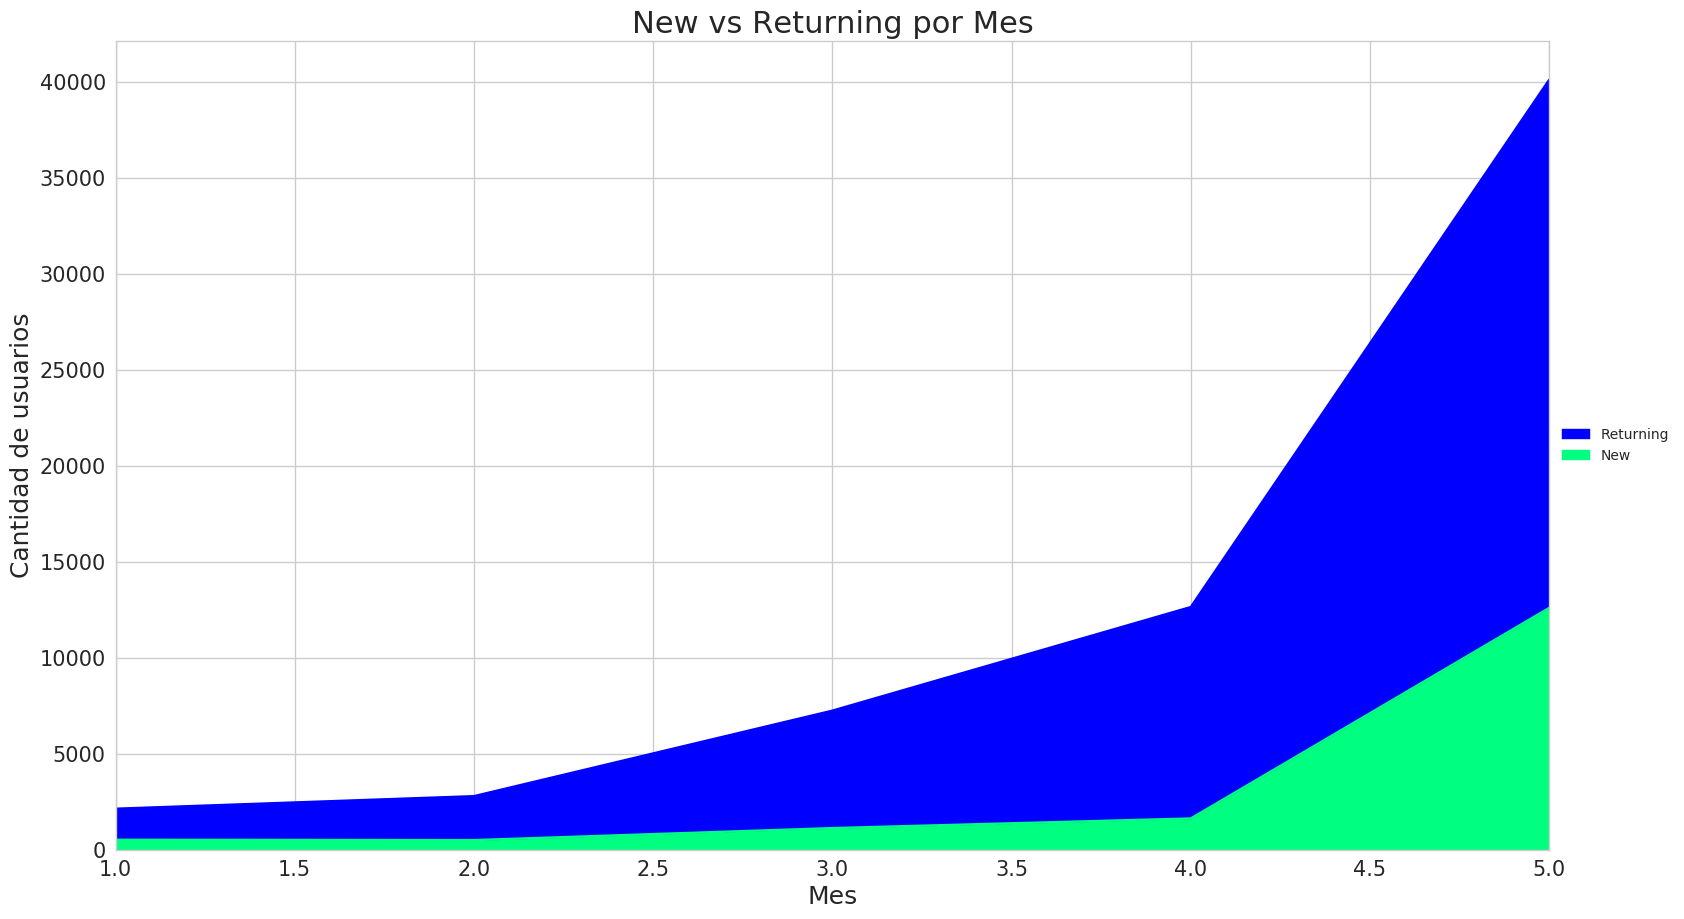

In [51]:
# Cuento y elimino el mes 6 datos incompletos
us_nuevos_mes = pd.DataFrame(eventos_2018.groupby(['month', 'new_vs_returning'])["new_vs_returning"].agg('count')).drop(6)
us_nuevos_mes.columns = ['count']
us_nuevos_mes.reset_index(inplace=True)

# Plot
f = plt.figure()
pivote_table_us_mes = pd.pivot_table(us_nuevos_mes, index='month', columns='new_vs_returning', values='count')
ax = pivote_table_us_mes.plot(kind='area', stacked=True, colormap='winter_r', figsize=(18.5, 10.5), ax=f.gca(), fontsize=15)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('New vs Returning por Mes', fontsize=22)
ax.set_ylabel('Cantidad de usuarios', fontsize=18);
ax.set_xlabel('Mes', fontsize=18);
# Limites grafico
ax.set_xlim(1,5)

plt.show()

#f.set_size_inches(18.5, 10.5, forward=True)
#f.savefig('img/new_vs_returning_mes.png')

## Marcas más buscadas en la interfaz web

In [52]:
searched_products = eventos_2018.loc[eventos_2018['event'] == 'searched products'][['timestamp','person','skus','search_term']].dropna(axis=0)
searched_products['search_term'] = searched_products['search_term'].str.lower()

In [71]:
marcas = {'Samsung' : 'samsung|sansung|sansumg|s3|s4|s5|s6|s7|s8|s9|a3|a5|a7|a8|a9|a10|j1|j2|j3|\
                        j4|j5|j7|j8|e5|e7|galaxy|note|prime|edge',
            'Apple' : 'iphone|apple|ipad|i phone|aple|iphome|4s|5s|6s|7s|8s',
            'Motorola' : 'moto|g4 plus|g5 plus',
              'LG' : 'lg|k8|k10|k 10|k4',
              'Asus' : 'asus|zonfone|zenfone|azus|assus',
              'Nokia' : 'nokia|lumia',
              'Lenovo' : 'lenovo',
              'Sony' : 'sony|xperia|x-peria',
              'Blackberry': 'blackberry',
              'Quantum' : 'quantum'
         }

for marca, values in marcas.items():
    searched_products.loc[searched_products['search_term'].str.contains(values)
        ,'searched_model'] = marca
    

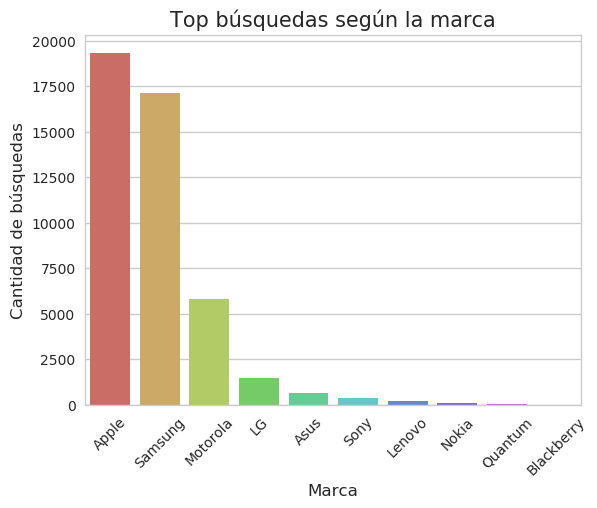

In [72]:
top_searched = searched_products.groupby('searched_model')['searched_model'].count().sort_values(ascending=False)
g = sns.barplot(x=top_searched.index, y=top_searched.values, orient="v", palette="hls")
g.set_title("Top búsquedas según la marca", fontsize=15)
g.set_ylabel("Cantidad de búsquedas", fontsize=12)
g.set_xlabel("Marca", fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

Seria interesante ver la relacion entre las busquedas, mas que nada se las dos marcas mas buscadas como loo son Apple y Samsung.

### Relacion busqueda por persona

In [56]:
# Busquedas por persona
busq_por_persona = searched_products.groupby('person')['searched_model'].value_counts()
busq_por_persona = busq_por_persona.unstack(fill_value=0)
busq_por_persona.reset_index(inplace=True)

In [57]:
# Cantidad total de busquedas.
busq_por_persona['sum'] = busq_por_persona.sum(axis=1)

In [59]:
# Personas que buscaron solo Apple
busq_por_persona['only_apple'] = (busq_por_persona['Apple'] > 0) & (busq_por_persona['sum'] == busq_por_persona['Apple'])
# Personas que buscaron solo Samsung
busq_por_persona['only_samsung'] = (busq_por_persona['Samsung'] > 0) & (busq_por_persona['sum'] == busq_por_persona['Samsung'])
# Personas que buscaron apple y ademas samsung
busq_por_persona['smg_and_apple'] = (busq_por_persona['Apple'] > 0) & (busq_por_persona['Samsung'] > 0)

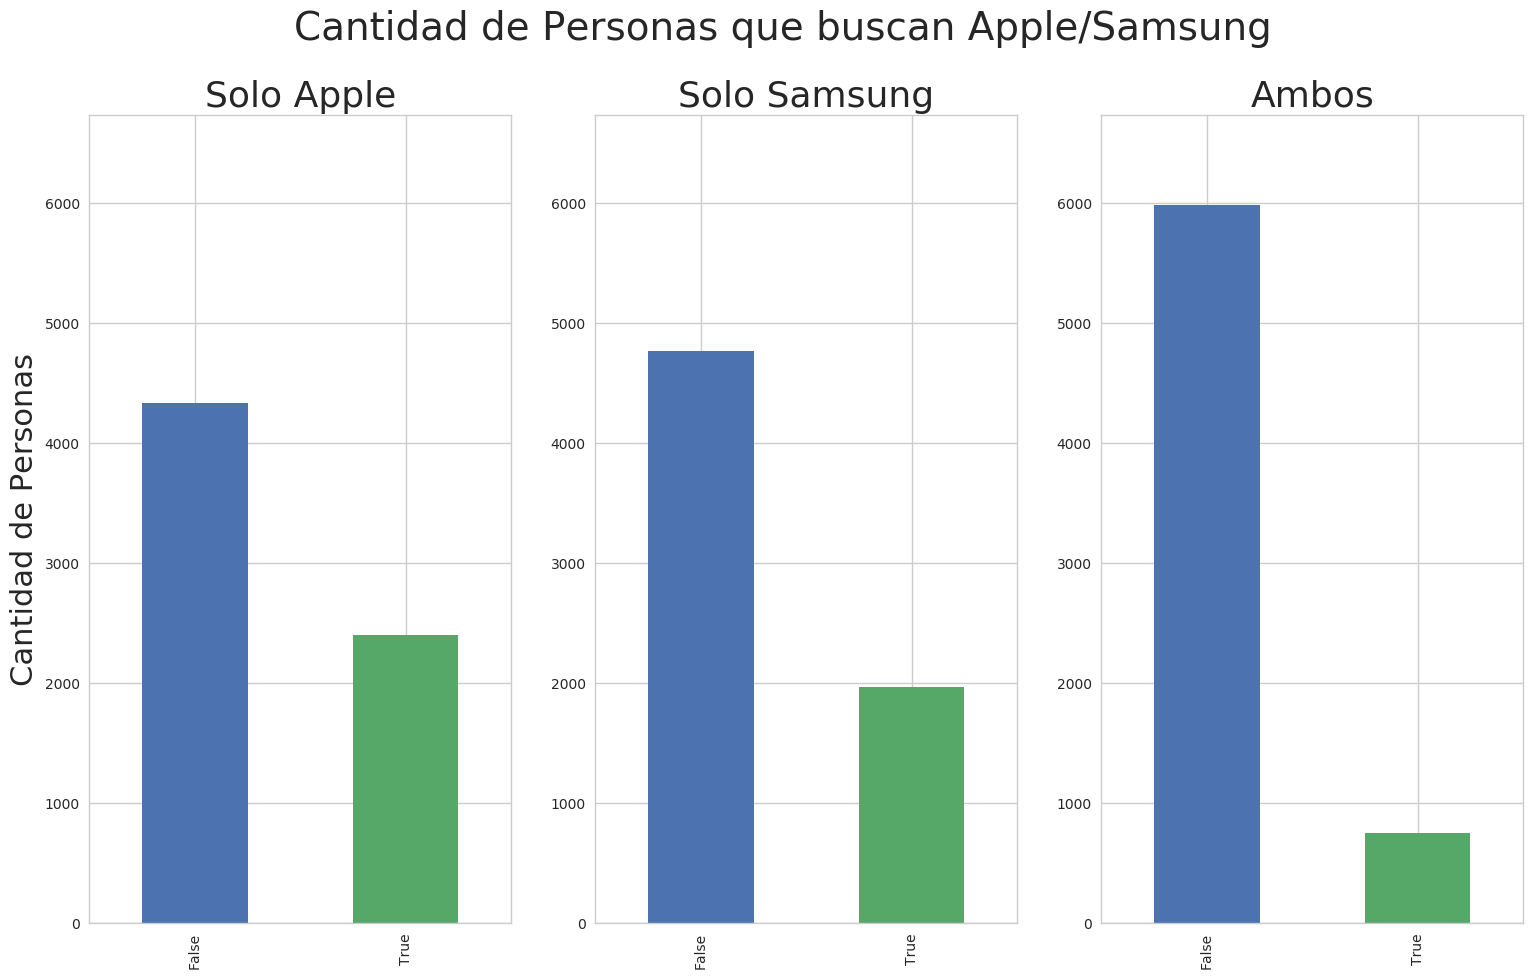

In [82]:


f = plt.figure()
f.suptitle('Cantidad de Personas que buscan Apple/Samsung', fontsize=28)
ylim = busq_por_persona['smg_and_apple'].value_counts().sum()
# Plot solo Apple
ax = plt.subplot(1,3,1)
plt.title('Solo Apple', fontsize=26)
busq_por_persona['only_apple'].value_counts().plot(kind='bar')
plt.ylabel('Cantidad de Personas', fontsize=22)
ax.set_ylim(0, ylim)

# Plot solo Samsung
plt.subplot(1, 3, 2)
ax = busq_por_persona['only_samsung'].value_counts().plot(kind='bar')
plt.title('Solo Samsung',  fontsize=26)
ax.set_ylim(0, ylim)

# Plot solo Ambos
plt.subplot(1,3,3)
plt.title('Ambos', fontsize=26)
ax = busq_por_persona['smg_and_apple'].value_counts().plot(kind='bar')
ax.set_ylim(0, ylim)

f.set_size_inches(18.5, 10.5, forward=True)
plt.show()

Podemos ver que hay mas personas que buscan solo Apple con respecto a Samsung, lo interesante es que la gente o busca una o la otra y no las dos. 

<Figure size 1800x1000 with 0 Axes>

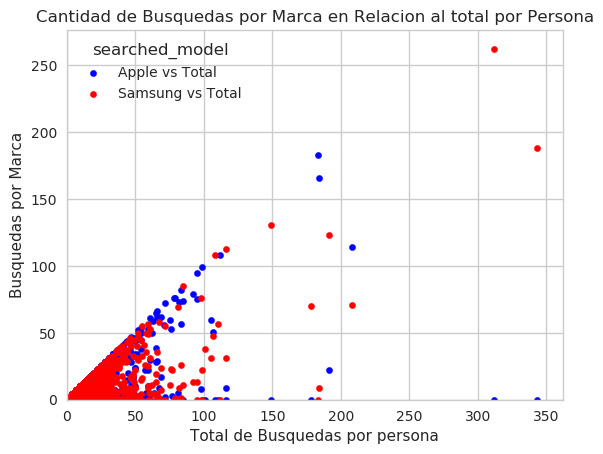

In [70]:
# Scatter plot
f = plt.figure()

ax = busq_por_persona.plot(kind="scatter", x='sum',y='Apple', color="b", label="Apple vs Total")
busq_por_persona.plot(kind="scatter", x="sum",y="Samsung", color="r", label="Samsung vs Total", ax=ax)
#df.plot( x="x",y="c", color="g", label="c vs. x", ax=ax)
ax.set_title("Cantidad de Busquedas por Marca en Relacion al total por Persona")
ax.set_xlabel("Total de Busquedas por persona")
ax.set_ylabel('Busquedas por Marca')

#Limites
ax.set_xlim(0, )
ax.set_ylim(0, )

f.set_size_inches(18, 10, forward=True)